In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random;
import tqdm;

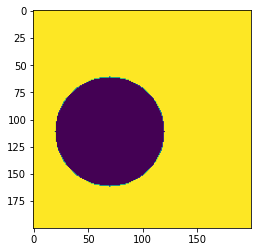

In [ ]:
IMAGE_SIZE = 200; #200*200
rad = random.randint(5,50); #radius 
c_x = random.randint(rad,IMAGE_SIZE-rad); #x좌표 (random)
c_y = random.randint(rad,IMAGE_SIZE-rad); #y좌표 (random)
blank_image = np.ones(shape=[IMAGE_SIZE, IMAGE_SIZE], dtype=np.uint8)
cv2.circle(blank_image, (c_x,c_y), rad, 0, -1);
plt.imshow(blank_image);

In [ ]:
# 학습 데이터 생성
def create_training_Data():
  l = 10000;  # 10000개 
  X_train = np.zeros(shape=[l,IMAGE_SIZE, IMAGE_SIZE,1]); # shape([10000개, 200, 200, 1 channel])
  Y_train = np.zeros(shape = [l,3]); # x, y 중심좌표, radius >> 3 
  for i in range(l):
    rad = random.randint(5,50);
    c_x = random.randint(rad,IMAGE_SIZE-rad);
    c_y = random.randint(rad,IMAGE_SIZE-rad);
    # normalization 
    Y_train[i,0]= c_x/IMAGE_SIZE;
    Y_train[i,1] = c_y/IMAGE_SIZE;
    Y_train[i,2] = rad/IMAGE_SIZE;
    blank_image = np.ones(shape=[IMAGE_SIZE, IMAGE_SIZE], dtype=np.uint8);
    X_train[i,:,:,0] = cv2.circle(blank_image, (c_x,c_y), rad, 0, -1);
  return {'X_Train' : X_train, 'Y_Train': Y_train};
  

In [ ]:
training_Data = create_training_Data();

array([70., 72., 50.])

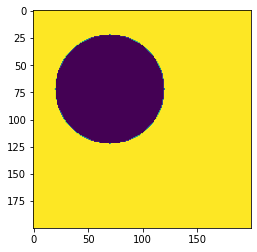

In [ ]:
plt.imshow(training_Data['X_Train'][1999].reshape(200,200))
IMAGE_SIZE*training_Data['Y_Train'][1999]

In [ ]:
import tensorflow
from tensorflow.keras import layers
from tensorflow.keras import Model

In [ ]:
img_input = layers.Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 1))

x = layers.Conv2D(5, 3, activation='relu', strides = 1, padding = 'same')(img_input) #3*3 kernel 사용 
x = layers.MaxPool2D(pool_size=2)(x)
x = layers.Conv2D(10, 3, activation='relu', strides = 1)(x)
x = layers.MaxPool2D(pool_size=2)(x)
x = layers.Conv2D(20, 3, activation='relu', strides = 1)(x)
x = layers.MaxPool2D(pool_size=2)(x)
x = layers.Conv2D(3, 5, activation='relu', strides = 1)(x)

# TODO
x = layers.Flatten()(x)
output = layers.Dense( 3, activation='relu')(x) #3 >> x좌표, y좌표, radius

model = Model(img_input, output)

model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 200, 200, 1)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 200, 200, 5)       50        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 100, 100, 5)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 98, 98, 10)        460       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 49, 49, 10)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 47, 47, 20)        1820      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 23, 23, 20)        0     

In [ ]:
model.compile(loss='mean_squared_error',optimizer= 'adam', metrics=['mse']);

In [ ]:
model.fit(training_Data["X_Train"],training_Data["Y_Train"], epochs = 3,verbose=1)

Epoch 1/3
313/313 [==============================] - 35s 15ms/step - loss: 0.0147 - mse: 0.0147
Epoch 2/3
313/313 [==============================] - 5s 14ms/step - loss: 0.0046 - mse: 0.0046
Epoch 3/3
313/313 [==============================] - 4s 14ms/step - loss: 0.0026 - mse: 0.0026


In [ ]:
# 3번째 이미지에 대해 projection 
IMAGE_SIZE*model.predict(training_Data['X_Train'][3].reshape(1,IMAGE_SIZE, IMAGE_SIZE,1)) 
# reshape(batch_size, image_size, image_size, grey_scale)

array([[119.30219 , 121.124664,  21.378443]], dtype=float32)

결과 : x좌표, y좌표, radius 순으로 나타남

In [ ]:
# 정답과 비교 
IMAGE_SIZE*training_Data['Y_Train'][3]

array([101.,  62.,  14.])

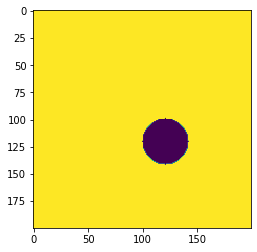

In [ ]:
plt.imshow(training_Data['X_Train'][3].reshape(200,200))

[40, 81, 9]
[[48.48135 81.8262   8.23938]]


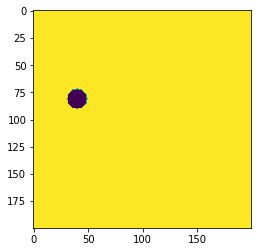

In [ ]:
IMAGE_SIZE = 200;
rad = random.randint(5,50);
c_x = random.randint(rad,IMAGE_SIZE-rad);
c_y = random.randint(rad,IMAGE_SIZE-rad);
print([c_x, c_y, rad])
blank_image = np.ones(shape=[IMAGE_SIZE, IMAGE_SIZE], dtype=np.uint8)
new_Image = cv2.circle(blank_image, (c_x,c_y), rad, 0, -1);
plt.imshow(new_Image);
print(IMAGE_SIZE*model.predict(new_Image.reshape(1,IMAGE_SIZE, IMAGE_SIZE,1)))